In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns


In [2]:
def updateIzh(tup, t):
    V, u = tup
    V1 =  (0.7*(V-(-60.))*(V-(-40.)) - u + 0)/100
    u =  0.03 *(-2*(V-(-60.))-u)
    return [V1,u]

def updateIzh2(tup, t):
    V, u = tup
    V1 =  0.1*(0.7*(V-(-60.))*(V-(-40.)) - u + 0)/100
    u =  0.1* 0.03 *(-2*(V-(-60.))-u)
    return [V1,u]

In [3]:
V = np.linspace(-70,-30,25)

U = np.linspace( -50,50., 25)

Y1, Y2 = np.meshgrid(V,U)

v, u = np.zeros(Y1.shape), np.zeros(Y2.shape) 

I, J = Y1.shape

vNullx = []
vNully = []

In [4]:
for i in range(I):
    for j in range(J):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = updateIzh((x,y),1)
        v[i,j] = yprime[0]
        u[i,j] = yprime[1]

In [5]:
y20 = [(-68, -40), (-40, 45), (-68,30), 
       (-50, 5), (-65, -25), (-50, -48) , 
       (-38, 48), (-44, -47)]

<IPython.core.display.Javascript object>


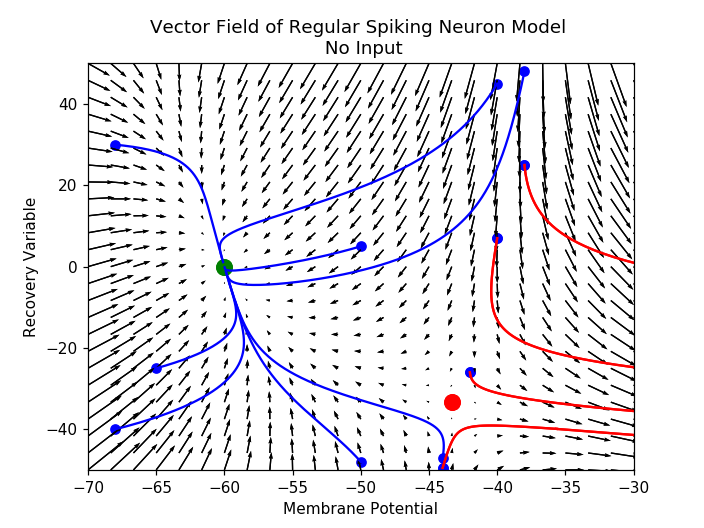

In [6]:
for y0 in y20:
    tspan = np.linspace(0,1100, 1000)
    #y0 = (y10, y20)
    ys = odeint(updateIzh2, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-')
    plt.scatter(ys[0,0], ys[0,1], c='b')

In [11]:
tspan = np.linspace(0,490, 100)

y0 = [(-44, -49.5), (-40, 7), (-38, 25)]

In [12]:
for xy in y0:
    ys = odeint(updateIzh2, xy, tspan)
    plt.plot(ys[:,0], ys[:,1], 'r-')
    plt.scatter(ys[0,0], ys[0,1], c='b' )
#'''
tspan = np.linspace(0,350, 50)
y0 = [(-42, -26)]

In [13]:
for xy in y0:
    ys = odeint(updateIzh2, xy, tspan)
    plt.plot(ys[:,0], ys[:,1], 'r-')
    plt.scatter(ys[0,0], ys[0,1], c='b' )

In [14]:
plt.xlim(-70, -30)
plt.ylim(-50,50)
Q = plt.quiver(Y1, Y2, v,u, scale=40)#, scale_units='dots')
plt.scatter(-60, 0, c='g', s=100)
plt.scatter(-43.3, -33.3, c='r', s=100)
plt.plot((-35.7, -30) ,(-39.9,-41.4), c='r')
plt.title('Vector Field of Regular Spiking Neuron Model \n No Input')
plt.xlabel('Membrane Potential')
plt.ylabel('Recovery Variable')

Text(38.94444598754247, 0.5, 'Recovery Variable')